# Quiz 1

In [25]:
import numpy as np
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

diabetes = load_diabetes()

x_train, x_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=42)
x_train = x_train.astype(np.float32)
y_train = y_train.astype(np.float32)


# y_values = [2*i + 1 for i in x_values]
# y_train = np.array(y_values, dtype=np.float32)
# y_train = y_train.reshape(-1, 1)

In [26]:
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

In [27]:
inputDim = 10
outputDim = 1       # takes variable 'y'
learningRate = 0.01
epochs = 100

model = linearRegression(inputDim, outputDim)
##### For GPU #######
if torch.cuda.is_available():
    model.cuda()

In [28]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)


In [29]:
for epoch in range(epochs):
    # Converting inputs and labels to Variable
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())
    else:
        inputs = Variable(torch.from_numpy(x_train))
        labels = Variable(torch.from_numpy(y_train))

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    print(loss)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

tensor(29651.2559, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 0, loss 29651.255859375
tensor(28717.6797, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 1, loss 28717.6796875
tensor(27821.0723, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 2, loss 27821.072265625
tensor(26959.9707, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 3, loss 26959.970703125
tensor(26132.9688, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 4, loss 26132.96875
tensor(25338.7188, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 5, loss 25338.71875
tensor(24575.9219, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 6, loss 24575.921875
tensor(23843.3320, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 7, loss 23843.33203125
tensor(23139.7480, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 8, loss 23139.748046875
tensor(22464.0332, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 9, loss 22464.033203125
tensor(21815.0723, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 10, 

/home/dnarsipu/anaconda3/envs/EE5900/lib/python3.10/site-packages/torch/nn/modules/loss.py:626: UserWarning: Using a target size (torch.Size([353])) that is different to the input size (torch.Size([353, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[[133.36191]
 [133.39139]
 [133.37845]
 [133.37823]
 [133.36598]
 [133.37405]
 [133.3806 ]
 [133.39421]
 [133.3986 ]
 [133.36502]
 [133.35817]
 [133.36911]
 [133.39925]
 [133.40187]
 [133.36981]
 [133.36554]
 [133.3756 ]
 [133.36015]
 [133.354  ]
 [133.35861]
 [133.38466]
 [133.37907]
 [133.36552]
 [133.35149]
 [133.37906]
 [133.38623]
 [133.38423]
 [133.38853]
 [133.3801 ]
 [133.38438]
 [133.36978]
 [133.38039]
 [133.3676 ]
 [133.3753 ]
 [133.3629 ]
 [133.37303]
 [133.36142]
 [133.38911]
 [133.38593]
 [133.38567]
 [133.37775]
 [133.33607]
 [133.36586]
 [133.4031 ]
 [133.39452]
 [133.37819]
 [133.36964]
 [133.40231]
 [133.38283]
 [133.37218]
 [133.38284]
 [133.38496]
 [133.3513 ]
 [133.39326]
 [133.37354]
 [133.41122]
 [133.37741]
 [133.36334]
 [133.3978 ]
 [133.37135]
 [133.37808]
 [133.37239]
 [133.39592]
 [133.34923]
 [133.3761 ]
 [133.3692 ]
 [133.37971]
 [133.39232]
 [133.34552]
 [133.34628]
 [133.34874]
 [133.37042]
 [133.37065]
 [133.36969]
 [133.364  ]
 [133.34825]
 [133.37961]

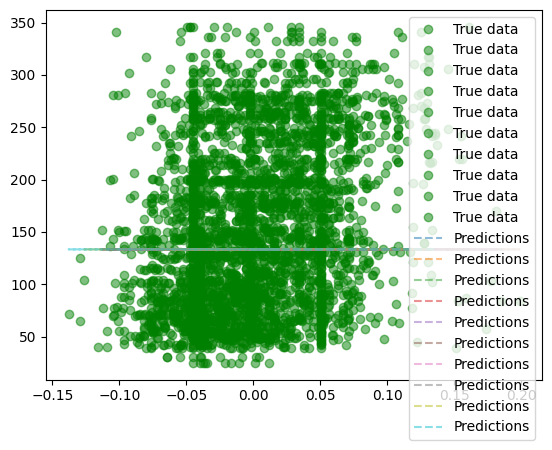

In [30]:
with torch.no_grad():  # we don't need gradients in the testing phase
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
    print(predicted)

plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()